<a href="https://colab.research.google.com/github/Suhas-S63/Machine_Learning_Lab_T1/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import threading
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Groceries_dataset.csv', skiprows=lambda x: x % 10 != 0)
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3876, 3)

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth

class FrequentItemsets:
    def __init__(self, data):
        self.data = data
        self.transactions = []
        for index, row in self.data.iterrows():
            self.transactions.append(row.dropna().tolist())
        self.encoded = pd.get_dummies(pd.DataFrame(self.transactions).stack()).sum(level=0)
        self.transactiondf = (self.encoded > 0).astype(int)

    def run_apriori(self, min_support, use_colnames=True):
        return apriori(self.transactiondf, min_support=min_support, use_colnames=use_colnames)

    def run_fpgrowth(self, min_support, use_colnames=True):
        return fpgrowth(self.transactiondf, min_support=min_support, use_colnames=use_colnames)

def main():
    data = pd.read_csv('/content/drive/MyDrive/Groceries_dataset.csv', skiprows=lambda x: x % 10 != 0)

    min_support = 0.02

    frequent_itemsets = FrequentItemsets(data)

    apriori_results = frequent_itemsets.run_apriori(min_support=min_support)
    fpgrowth_results = frequent_itemsets.run_fpgrowth(min_support=min_support)

    print("Apriori Results:")
    print(apriori_results)

    print("\nFP-Growth Results:")
    print(fpgrowth_results)

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori Results:
     support              itemsets
0   0.025026       (bottled water)
1   0.052116    (other vegetables)
2   0.049020          (rolls/buns)
3   0.024510     (root vegetables)
4   0.023478             (sausage)
5   0.026574       (shopping bags)
6   0.040506                (soda)
7   0.029412      (tropical fruit)
8   0.020124  (whipped/sour cream)
9   0.059856          (whole milk)
10  0.033540              (yogurt)

FP-Growth Results:
     support              itemsets
0   0.029412      (tropical fruit)
1   0.052116    (other vegetables)
2   0.033540              (yogurt)
3   0.023478             (sausage)
4   0.040506                (soda)
5   0.059856          (whole milk)
6   0.049020          (rolls/buns)
7   0.025026       (bottled water)
8   0.024510     (root vegetables)
9   0.026574       (shopping bags)
10  0.020124  (whipped/sour cream)


In [ ]:
class FrequentItemsets:
    def __init__(self, data):
        self.data = data
        self.transactions = []
        for index, row in self.data.iterrows():
            self.transactions.append(row.dropna().tolist())
        self.encoded = pd.get_dummies(pd.DataFrame(self.transactions).stack()).sum(level=0)
        self.transactiondf = (self.encoded > 0).astype(int)

    def run_apriori(self, min_support, use_colnames=True):
        return apriori(self.transactiondf, min_support=min_support, use_colnames=use_colnames)

    def run_fpgrowth(self, min_support, use_colnames=True):
        return fpgrowth(self.transactiondf, min_support=min_support, use_colnames=use_colnames)

def run_algorithms_with_timing(frequent_itemsets, min_support):
    apicompleted = threading.Event()
    fpcompleted = threading.Event()
    exetime = [0, 0]

    def run_api():
        stime = time.time()
        frequent_itemsets.run_apriori(min_support=min_support)
        exetime[0] = time.time() - stime
        apicompleted.set()

    def run_fp():
        stime = time.time()
        frequent_itemsets.run_fpgrowth(min_support=min_support)
        exetime[1] = time.time() - stime
        fpcompleted.set()

    apthread = threading.Thread(target=run_api)
    fpthread = threading.Thread(target=run_fp)

    apthread.start()
    fpthread.start()

    apicompleted.wait()
    fpcompleted.wait()

    apthread.join()
    fpthread.join()

    return exetime

def main():
    data = pd.read_csv('/content/drive/MyDrive/Groceries_dataset.csv', skiprows=lambda x: x % 10 != 0)
    min_support = 0.02

    frequent_itemsets = FrequentItemsets(data)

    exetime = run_algorithms_with_timing(frequent_itemsets, min_support)

    print("Apriori Execution Time:", exetime[0])
    print("FP-Growth Execution Time:", exetime[1])

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori Execution Time: 0.21510863304138184
FP-Growth Execution Time: 0.29355788230895996


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


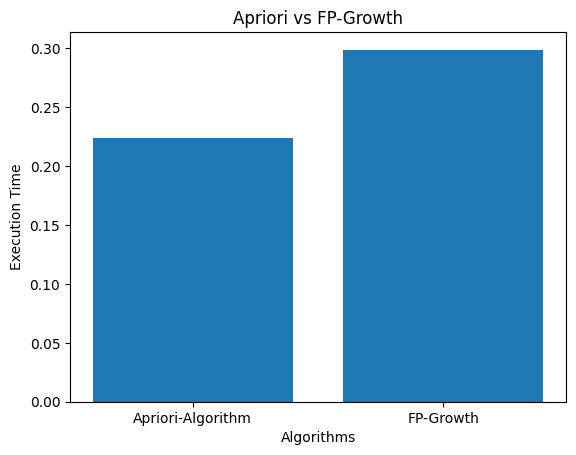

Apriori is Faster


In [ ]:
def run_algorithms_with_timing(frequent_itemsets, min_support):
    apicompleted = threading.Event()
    fpcompleted = threading.Event()
    exetime = []

    def run_api():
        stime = time.time()
        frequent_itemsets.run_apriori(min_support=min_support)
        exetime.append(time.time() - stime)
        apicompleted.set()

    def run_fp():
        stime = time.time()
        frequent_itemsets.run_fpgrowth(min_support=min_support)
        exetime.append(time.time() - stime)
        fpcompleted.set()

    apthread = threading.Thread(target=run_api)
    fpthread = threading.Thread(target=run_fp)

    apthread.start()
    fpthread.start()

    apicompleted.wait()
    fpcompleted.wait()

    apthread.join()
    fpthread.join()

    return exetime

def main():
    data = pd.read_csv('/content/drive/MyDrive/Groceries_dataset.csv', skiprows=lambda x: x % 10 != 0)
    min_support = 0.02

    frequent_itemsets = FrequentItemsets(data)

    exetime = run_algorithms_with_timing(frequent_itemsets, min_support)

    algorithms=['Apriori-Algorithm','FP-Growth']
    plt.bar(algorithms,exetime)
    plt.xlabel('Algorithms')
    plt.ylabel('Execution Time')
    plt.title('Apriori vs FP-Growth')
    plt.show()

    if exetime[0]<exetime[1]:
      print("Apriori is Faster")
    elif exetime[1]<exetime[0]:
      print("FP-Growth is Faster")
    else:
      print("Both are equal")

if __name__ == "__main__":
    main()